# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Import Data

In [2]:
# Converting the .csv into a DataFrame with pandas 
df = pd.read_csv('/workspaces/EDA_5_alfonso/data/raw/diabetes.csv')

# This line displays the first 5 rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Description

Execution of a .info() for a oversight of the dataset. This is value information regarding the shape of the data, datatypes and valid values by columns.

In [3]:
# Display concise information about the DataFrame, including data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Get the dimensions (number of rows and columns) of the DataFrame 
df.shape

(768, 9)

# Univariant Analysis

At this stage of our analysis, we will undertake a thorough univariate examination of each column in our dataset, presenting the findings through histogram-type diagrams. This methodological choice aims to effectively visualize the data count for each variable, allowing us to delve into our initial observations with greater detail.

By opting for graphical representation through histograms, we not only gain a quantitative perspective but also uncover patterns and trends in the data distribution. This approach serves as a starting point for extracting initial insights and establishing the foundations of our exploratory analysis. As we scrutinize these visual representations, we are better positioned to make preliminary observations about the nature of our variables, paving the way for more informed interpretations in the subsequent phases of our data analysis.

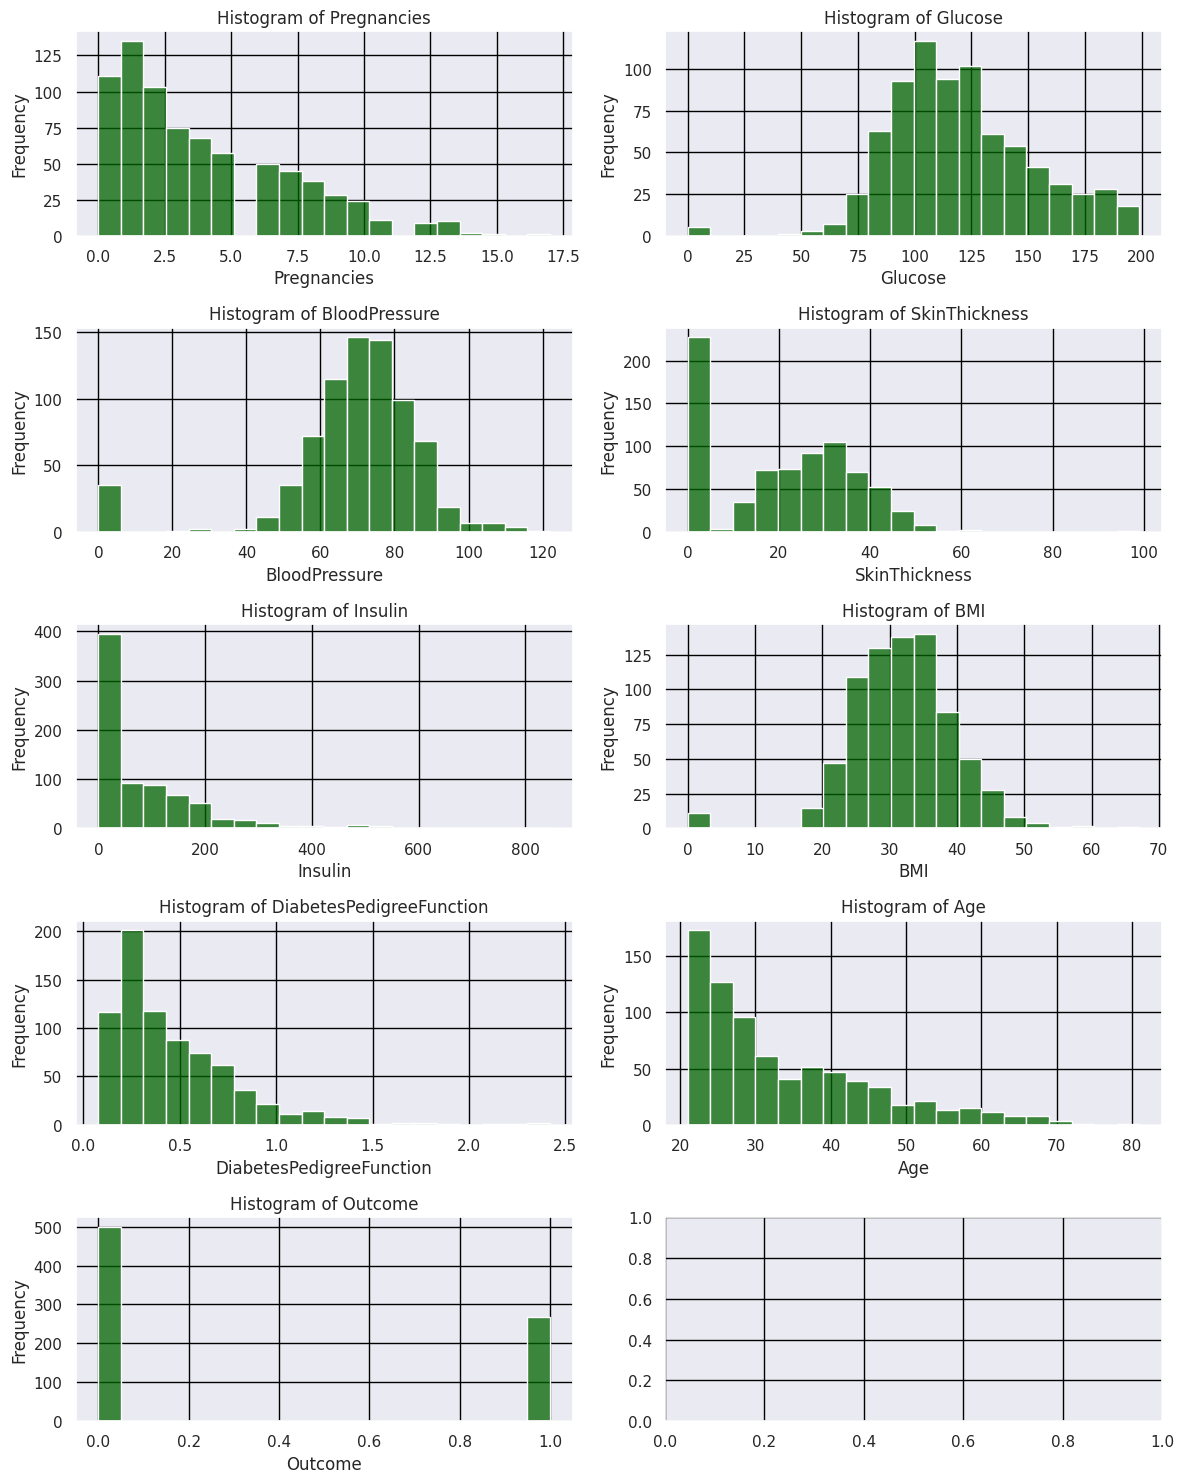

In [5]:
# Set seaborn (sns) plot style with specific color configurations
sns.set(rc={'axes.facecolor': '#eaeaf2', 'grid.color': 'black'})

# Get the number of columns in the DataFrame
num_columns = len(df.columns)

# Set the number of subplots per row
num_subplots_per_row = 2

# Calculate the total number of rows needed
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Flatten the subplot matrix for easy iteration
axes = axes.flatten()

# Iterate over each column and create a histogram
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='darkgreen', ax=ax)  # You can adjust the parameters according to your preferences
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

Observations:

    - Pregnancy count exhibits a right-skewed distribution, indicating a decline in values as the number of pregnancies increases.
    - Glucose levels similarly display a right-skewed distribution, albeit less pronounced than the pregnancy count.
    - Blood pressure follows a normal distribution, with noteworthy occurrences of zero values that merit further analysis.
    - Skin thickness data reveals a pattern similar to blood pressure, with a prominent peak at zero and an otherwise normal distribution.
    - Insulin values showcase a right-skewed distribution with a significant spike at zero, necessitating further exploration.
    - BMI (Body Mass Index) shows a distribution resembling normality, punctuated by a few implausible zero values.
    - Pedigree scores exhibit a right-skewed distribution, with a prominent peak between 0 and 0.5.
    - Age is distinctly right-skewed, indicating that the majority of individuals in the dataset are young.
    - Lastly, examining our target variable visually reveals approximately twice as many patients without diabetes as those with the condition.

It is worth noting that there are specific columns with numerous zero values that, at first glance, may appear incongruent. We will delve into a more detailed analysis of these instances during the feature engineering phase to better understand their implications and potential impact on our model.

# Multivariant Analysis

Having a numerical format dataset allows us to perform this stage without need of any transformation, therefore we now advance to the multivariate analysis phase. In this stage, we will explore the relationships between each variable and our target column, namely the prevalence of heart disease. For this purpose, we have opted for the utilization of Seaborn's regplot, a tool that allows us to visually represent the data dispersion through points. Additionally, the accompanying regression line provides valuable insights into the relationship between the compared variables, as indicated by its slope.

By employing regplot, we aim to uncover patterns, correlations, and potential dependencies between the various factors and the prevalence of heart disease. The scatter plot will give us a nuanced view of the data points' distribution, while the regression line will offer a quantitative understanding of the relationship strength and direction.

This analytical approach will guide us in identifying influential variables and assessing their impact on diabetes. It forms a critical step in unraveling the complex interplay of factors that contribute to health outcomes of this matter. As we proceed with this multivariate analysis, our goal is to extract meaningful insights that will inform subsequent steps in our data-driven exploration.

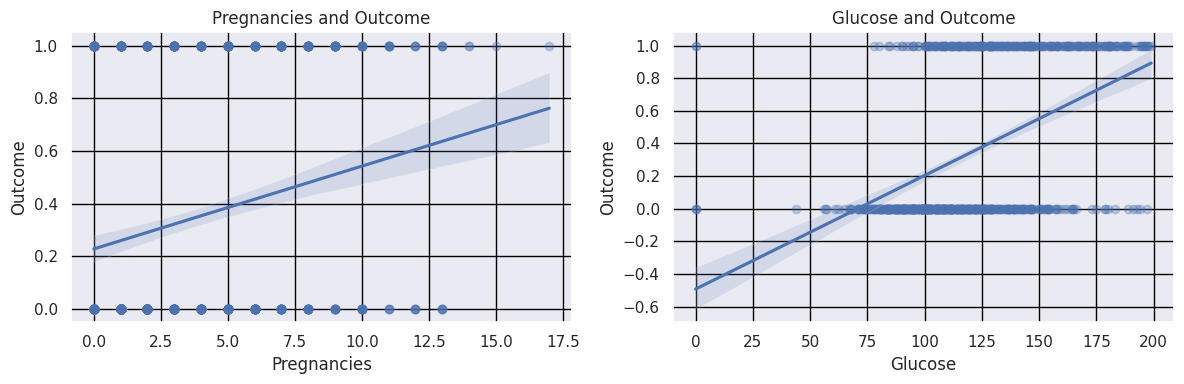

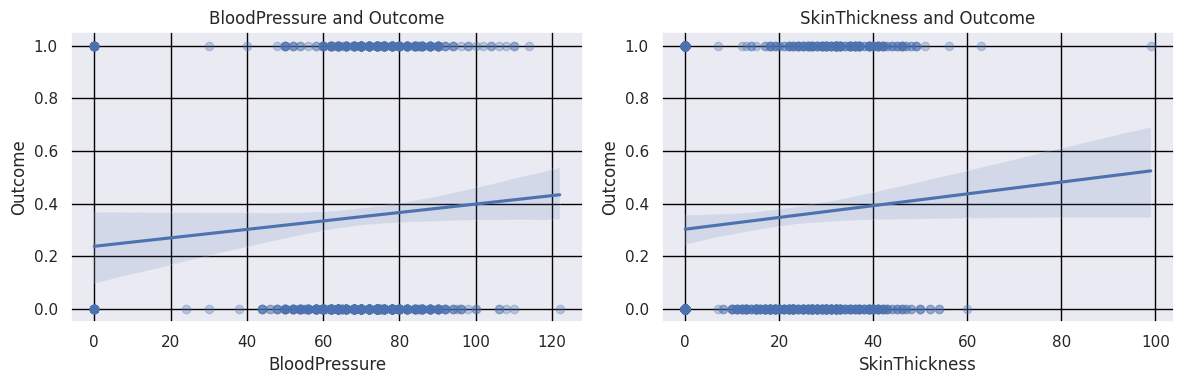

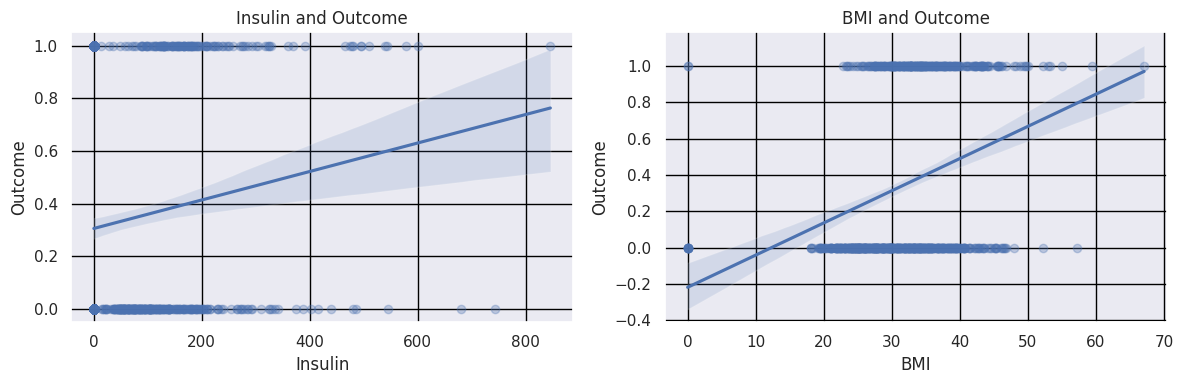

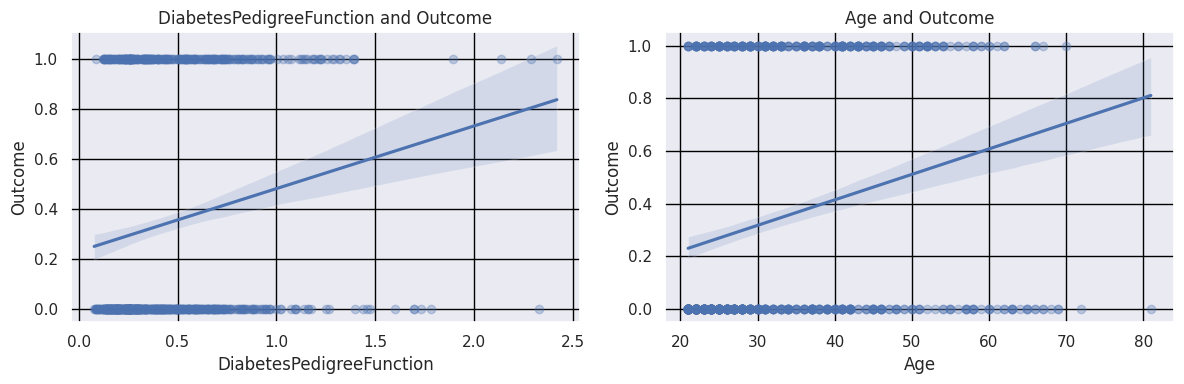

In [6]:
# Specify the target column for analysis
target_column = 'Outcome'

# Identify feature columns by excluding the target column
feature_columns = [col for col in df.columns if col != target_column]

# Split the feature columns into pairs for plotting
column_pairs = [
    (feature_columns[i], feature_columns[i + 1]) if i + 1 < len(feature_columns) else (feature_columns[i], None)
    for i in range(0, len(feature_columns), 2)
]

# Iterate through column pairs and plot regression plots
for pair in column_pairs:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Iterate over the two columns in the pair
    for i, feature_column in enumerate(pair):
        if feature_column is not None:
            # Create a scatter plot with a regression line
            sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha': 0.3}, ax=axes[i])

            # Set title and labels for the subplot
            axes[i].set_title(f'{feature_column} and {target_column}')
            axes[i].set_xlabel(feature_column)
        else:
            # If the column is None, remove the second axis
            fig.delaxes(axes[i])

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

After executing the code and closely inspecting the results of the multivariate analysis conducted using Seaborn's regplot in Python, it is impossible to ignore the conspicuous trends observed in the plotted lines. While some are more steeply inclined than others, it can be asserted that all variables in this dataset exhibit some degree of influence on the target variable, which denotes the presence or absence of diabetes in patients.

Upon initial observation, the lines with the most pronounced slopes appear to be associated with glucose and insulin variables. These findings suggest a notable impact of glucose and insulin levels on the likelihood of a patient having diabetes, as indicated by the target variable. Further exploration and quantitative assessment will be crucial to comprehensively understand the strength and nature of these relationships during subsequent stages of analysis.

At this juncture, we will conduct more specific analyses, commencing with an examination of the correlation between two variables, specifically glucose and insulin, in relation to the target variable outcome (presence or absence of diabetes). This focused analysis aims to unveil the nuanced interplay between these key predictors and the target variable, providing deeper insights into their individual contributions to the overall predictive model.

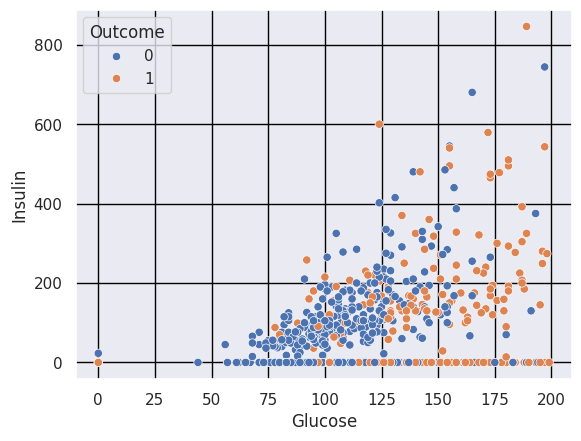

In [7]:
# The color of the points is determined by the "Outcome" variable
sns.scatterplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

# Display the plot
plt.show()

The positive correlation between elevated levels of both Glucose and Insulin becomes evident as the count of individuals diagnosed with diabetes increases proportionally. In other words, higher concentrations of Glucose and Insulin are associated with a heightened likelihood of an individual being diagnosed with diabetes. This observed relationship underscores the potential significance of these variables in influencing the occurrence of diabetes within the dataset.

We will now undertake another comparative analysis, this time examining the relationship between BMI (Body Mass Index) and the count of pregnancies. The objective is to discern which variable carries more weight in determining the likelihood of diabetes. By exploring the correlation between BMI and the number of pregnancies, we aim to gain insights into the respective influences of these factors on the occurrence of diabetes within the dataset.

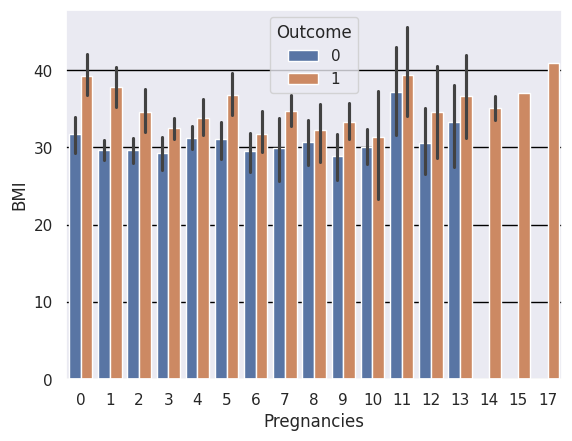

In [8]:
# The color of the bars is determined by the "Outcome" variable
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

# Display the plot
plt.show()

A higher BMI level emerges as a more significant determinant of diabetes compared to the number of pregnancies. However, it is noteworthy that once the number of pregnancies exceeds 13, there appears to be an inevitable association with the onset of diabetes. This observation suggests that while elevated BMI plays a substantial role in diabetes risk, an exceptionally high number of pregnancies may also contribute significantly to the likelihood of developing diabetes, warranting further scrutiny and consideration.

To conclude this series of brief analyses, I choose to explore the relationship between the diabetes pedigree and age in connection with the target variable. This examination aims to unveil insights into how the diabetes pedigree score and age individually correlate with the likelihood of having diabetes, contributing to our comprehensive understanding of the predictive factors within the dataset.

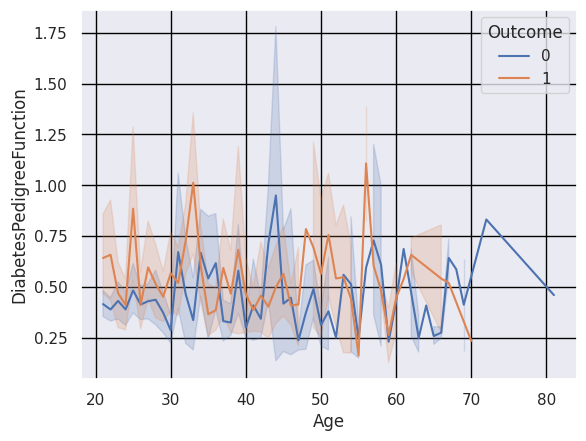

In [9]:
# The color of the lines is determined by the "Outcome" variable
sns.lineplot(data=df, x="Age", y="DiabetesPedigreeFunction", hue="Outcome")

# Display the plot
plt.show()

Within the age brackets of 20 to 35 years and 47 to 57 years, there seems to be an increased probability of developing diabetes when there is a familial history of the condition. Notably, our data indicates a curious pattern in the age range of 40 to 46 years, where individuals may not exhibit a heightened risk of diabetes despite a familial predisposition. A similar trend is observed in ages exceeding 65 years.

This intriguing finding suggests that the influence of familial diabetes on the likelihood of the condition varies across different age groups. While a familial history appears to be a significant factor in certain age ranges, there are peculiar exceptions, particularly in the aforementioned age brackets, where the familial association with diabetes does not seem to correspond to an increased probability. Further investigation and a nuanced analysis of these age-specific dynamics may provide valuable insights into the interplay between genetic factors and age in the development of diabetes.

In the upcoming correlation matrix, we will gain a comprehensive overview of all relationships among variables, providing confirmation of our previous observations. This matrix will serve as a valuable tool for assessing the degree and direction of associations between each pair of variables, offering a more nuanced understanding of the interdependencies within the dataset. By scrutinizing the correlation coefficients, we aim to identify additional patterns and confirm the significance of observed relationships. This step will contribute to a more thorough and holistic interpretation of the data, guiding us towards a more informed analysis of the factors influencing heart problems.

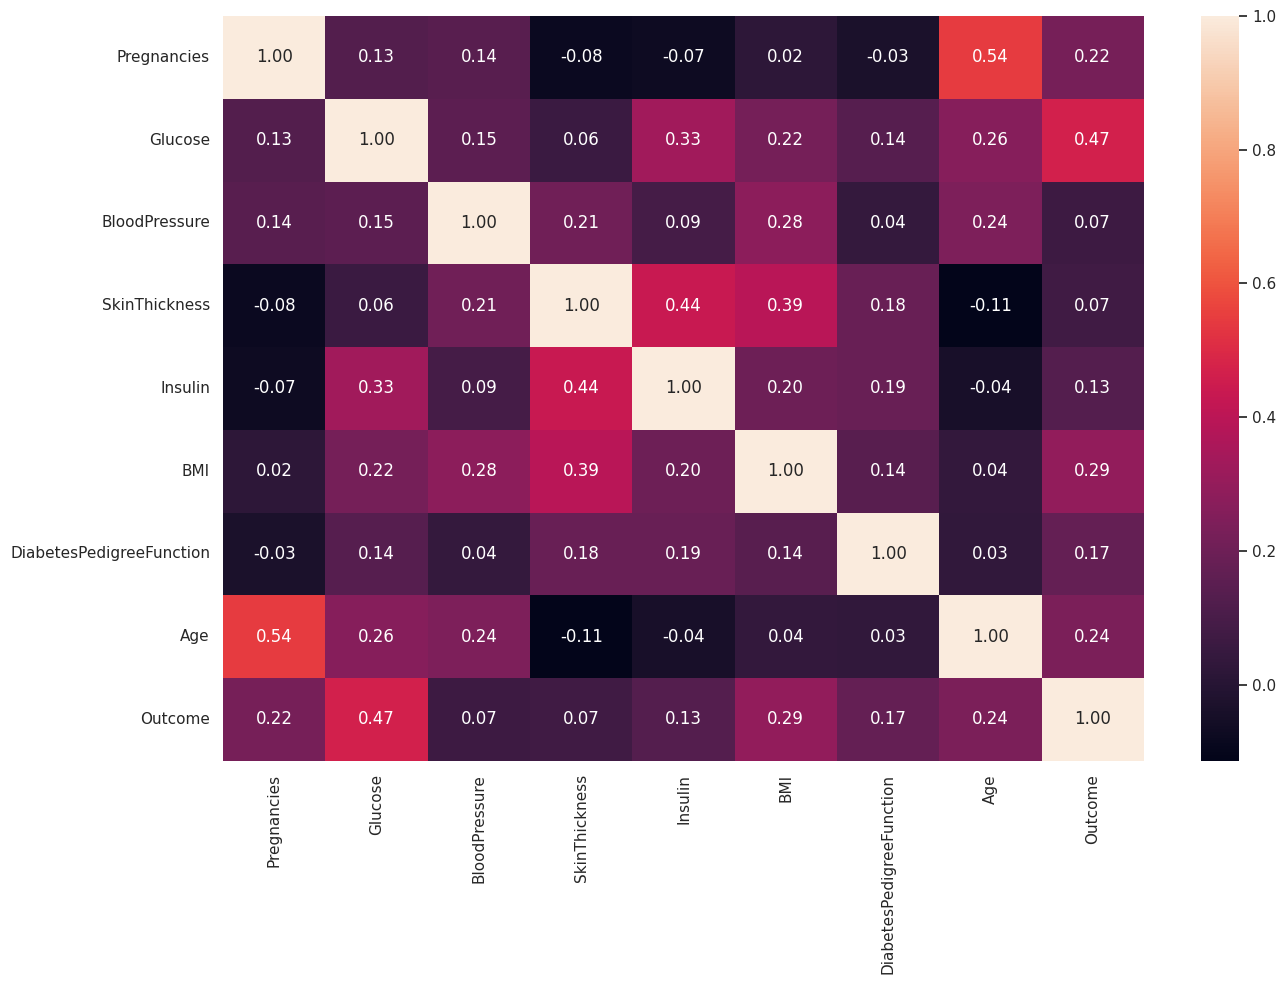

In [10]:
# Create a heatmap to visualize the correlation matrix of the DataFrame using seaborn (sns)
fig, axis = plt.subplots(figsize=(14, 10))

# Get a list of column names from the DataFrame
lista_de_columnas = df.columns.tolist()

# Generate a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Adjust layout for better visualization
plt.tight_layout()

# Display the heatmap
plt.show()

The correlation matrix output reveals that the most substantial association with the Outcome variable is observed with the levels of Glucose (0.47), followed by BMI (0.29), and age (0.24). These correlation coefficients suggest a moderate to moderately strong relationship between these variables and the likelihood of diabetes.

Conversely, certain predictors, such as blood pressure and skin thickness, exhibit notably lower correlations with the Outcome variable, implying limited utility in our model training process. It is important to note that none of the correlations are exceptionally strong, providing early indications for model selection considerations.

As a noteworthy anecdote, it is interesting to highlight the prominent correlation observed between pregnancies and age. This correlation is logically sound, considering that as individuals age, they typically have more time to experience pregnancies. This observation adds a nuanced understanding of the dataset dynamics and contributes to the broader context of feature relationships.

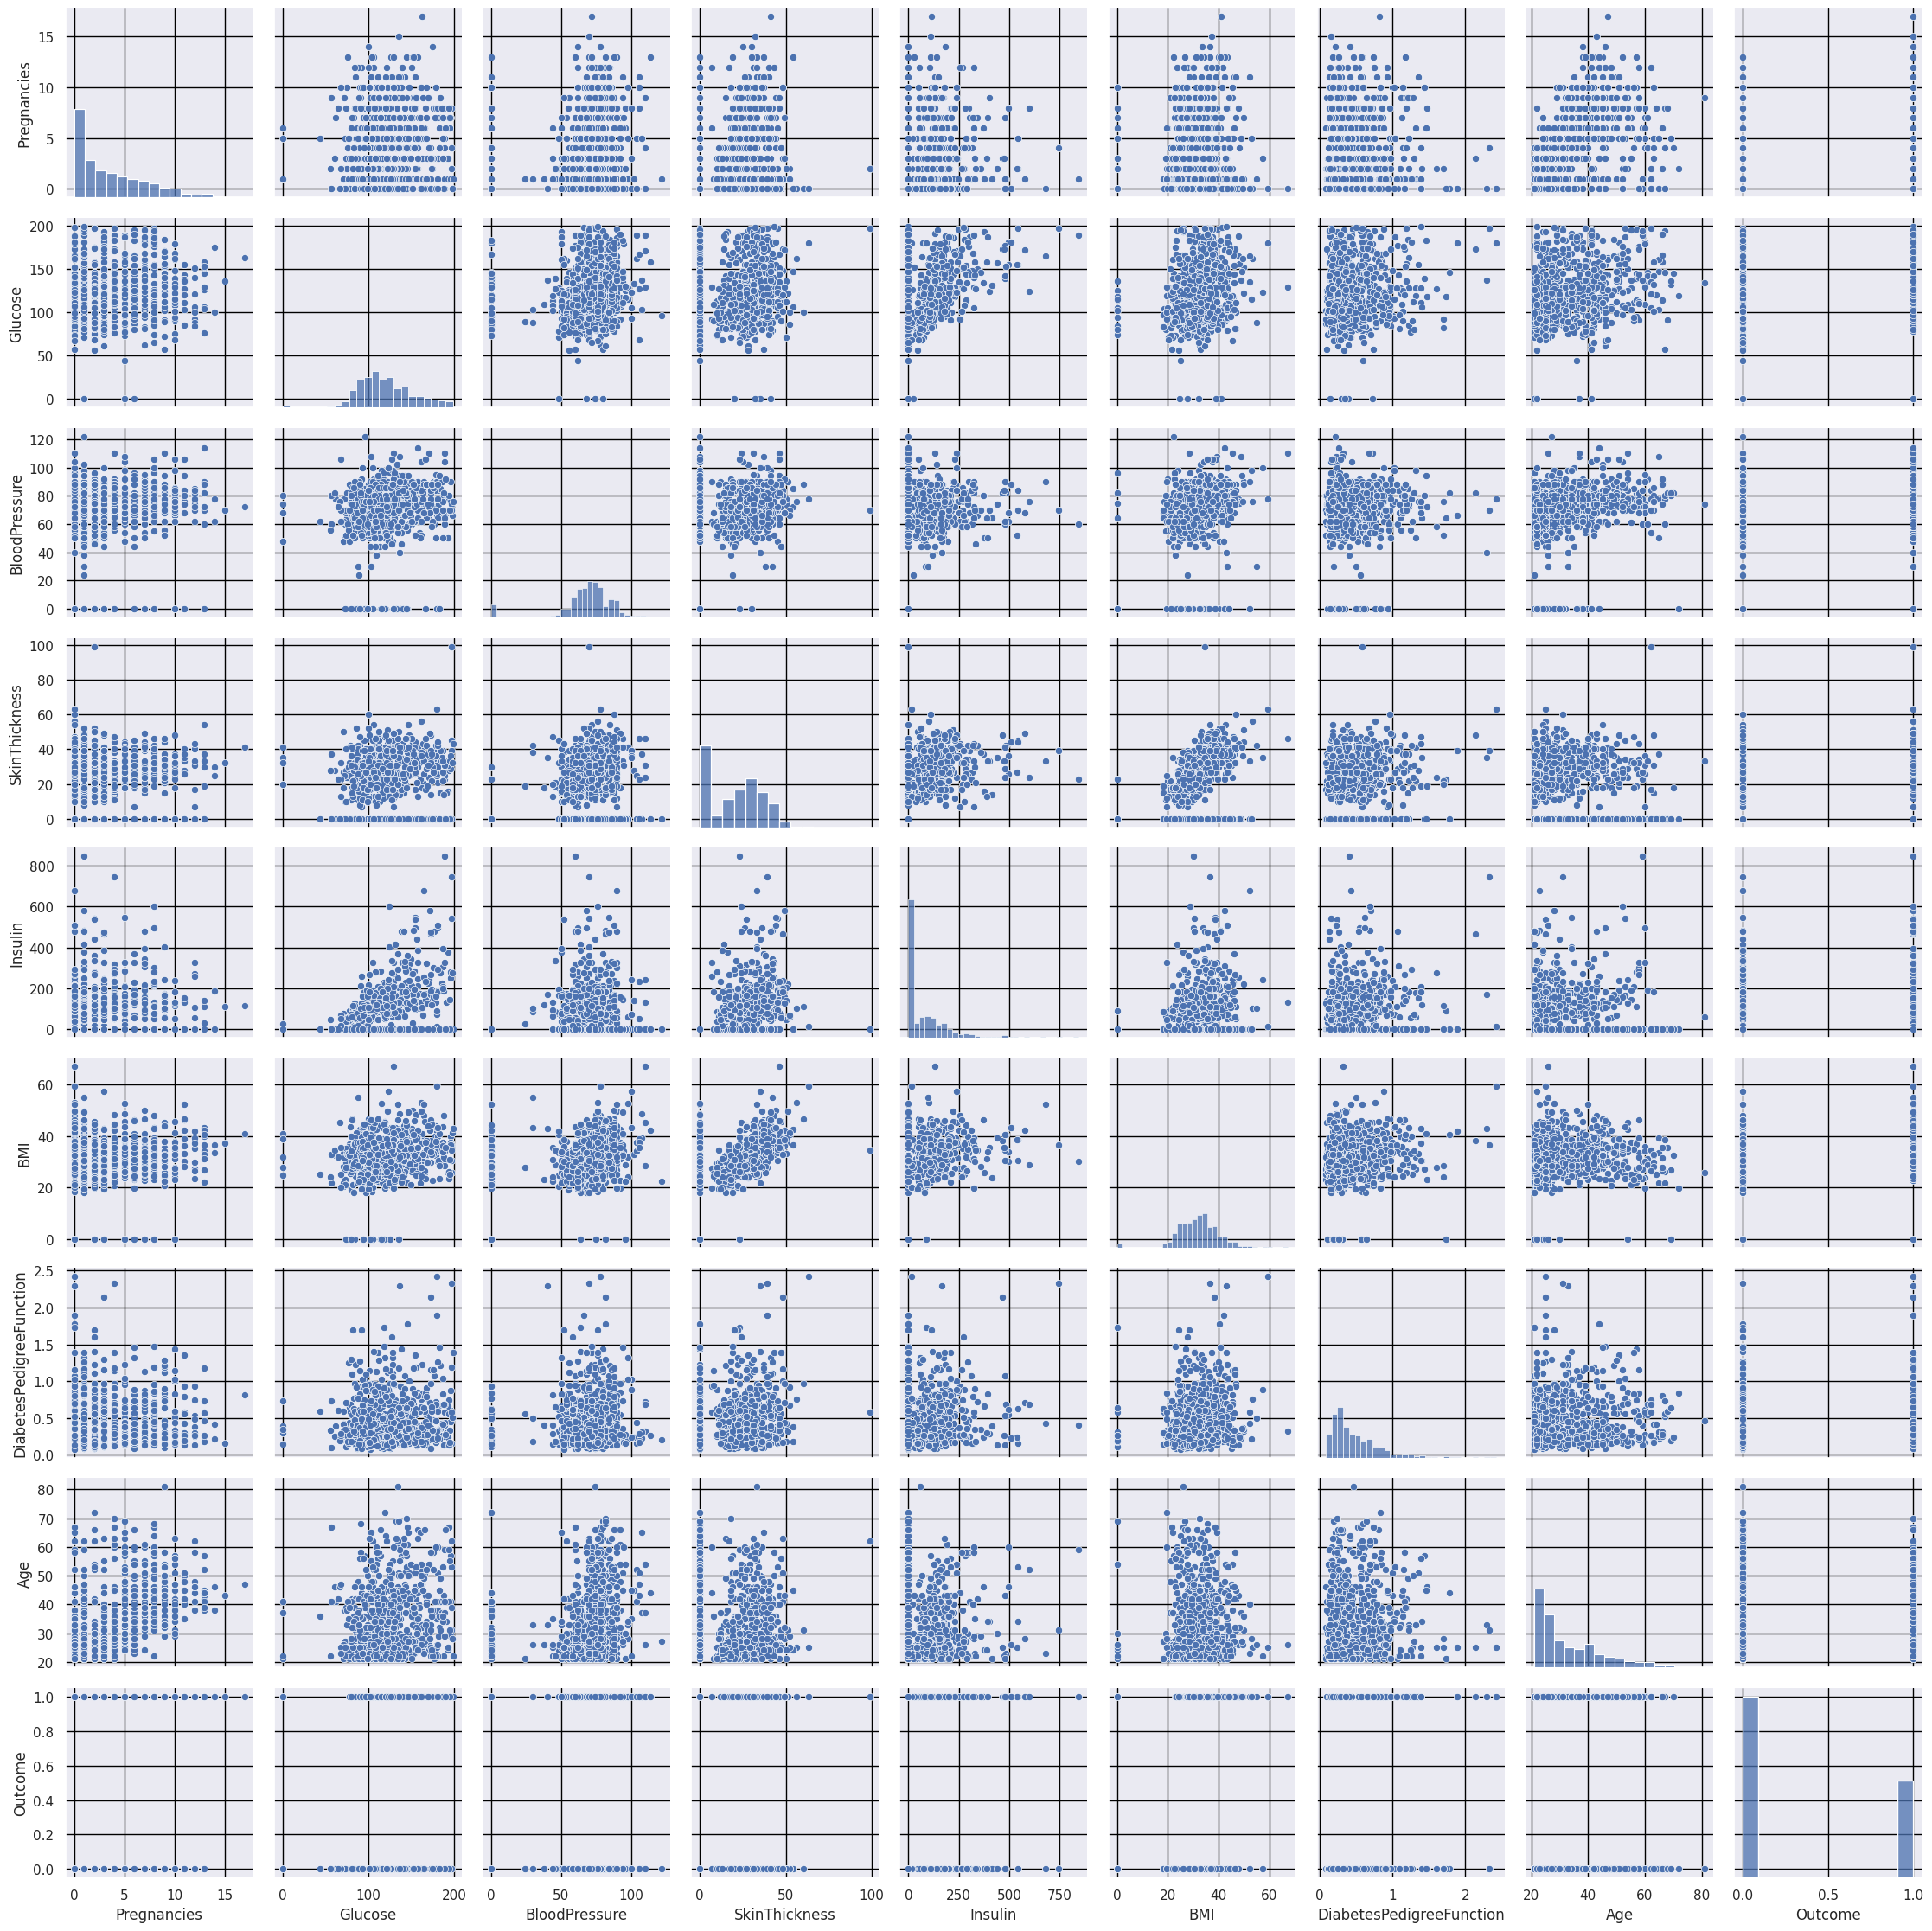

In [11]:
# Create a pair plot using seaborn (sns) to visualize pairwise relationships in the DataFrame
sns.pairplot(df)


plt.tight_layout()
plt.show()

# Feature Engineering

## Outliers

In the feature engineering phase, our focus will be on analyzing outliers, as we identified several data points during the multivariate analysis that significantly deviated from the majority of the dataset. We will delve into understanding the nature of these outliers and subsequently assess the appropriate course of action.

Outliers can provide valuable insights into potential data anomalies, extreme conditions, or errors in measurement. By closely examining these data points, we aim to determine whether they represent genuine phenomena or if they are indicative of errors or irregularities in the dataset.

Once we have a clear understanding of the outliers and their significance, we can then make informed decisions about how to handle them. This may involve strategies such as transforming the data, imputing missing values, or, in some cases, removing outliers that can unduly influence our analysis.

Our objective in this feature engineering step is to ensure the robustness and reliability of our dataset, paving the way for more accurate and meaningful interpretations in the subsequent stages of our analysis.

The approach I plan to take is to sort the variables in descending order based on their standard deviation. This will provide us with columns where the difference between their quartiles is the most pronounced, which is a strong indicator of the presence of outliers.

This approach takes into account the interquartile range (IQR), an effective metric for detecting outliers by focusing on the dispersion of the central 50% of the data.

By prioritizing variables with the largest interquartile differences, we will identify those with significant variability in the center of the distribution. This will help uncover the presence of outliers that may require special attention during feature engineering.

Once we have this sorted list, we can conduct a more detailed analysis of those specific variables to better understand the nature of the outliers and determine the most appropriate strategy to address them, whether through imputation, data transformation, or, in some cases, selective removal.

In [12]:
# Generate descriptive statistics for the DataFrame using the describe() method and sort the transposed DataFrame based on the standard deviation (std) in descending order
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42


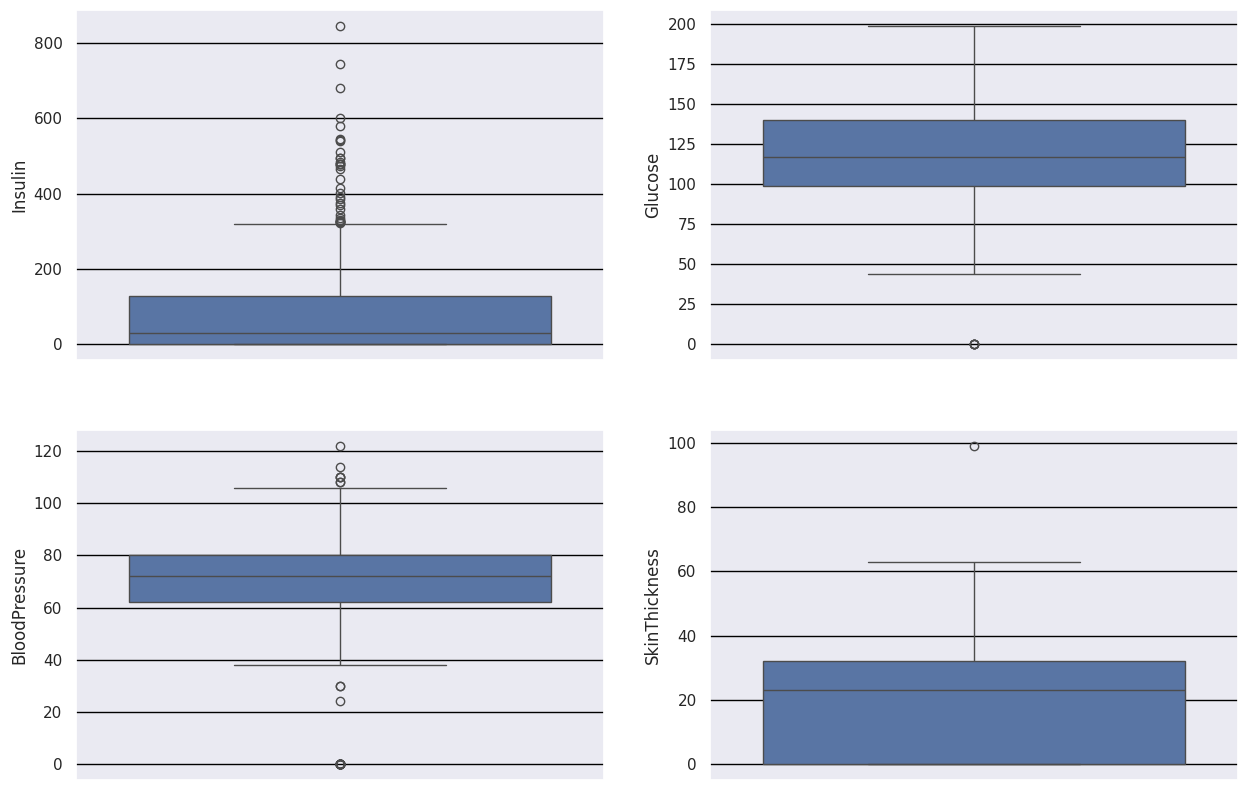

In [13]:
# Create subplots for each variables with heavy outliers with a 2x2 grid for boxplots using seaborn (sns)
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df, y="Insulin")
sns.boxplot(ax=axis[0, 1], data=df, y="Glucose")
sns.boxplot(ax=axis[1, 0], data=df, y="BloodPressure")
sns.boxplot(ax=axis[1, 1], data=df, y="SkinThickness")

plt.show()

Due to a notable prevalence of values exceeding the upper 75th percentile in both the Insulin and Blood Pressure variables, we have decided to standardize them. By setting the values of these outliers equal to the respective upper 75th percentiles, we aim to address the impact of extreme values on both variables. This adjustment ensures a more balanced and representative dataset, optimizing it for subsequent analyses and modeling efforts.

In [14]:
# Set upper limit variable
upper_biggot = 127

# Set all values above that value to the variable
df.loc[df["Insulin"] > upper_biggot, "Insulin"] = upper_biggot

In [15]:
# Set upper limit variable
upper_biggot = 122

# Set all values above that value to the variable
df.loc[df["BloodPressure"] > upper_biggot, "BloodPressure"] = upper_biggot

Currently, we have implemented code to display the locations of the most significant outliers within the dataset. This step is undertaken for visual inspection and aims to identify the specific indices or positions where the most extreme outliers are situated. By pinpointing these outliers, we gain a clearer understanding of their locations within the dataset, facilitating further investigation or targeted interventions if deemed necessary.

In [16]:
# Define a list of columns to identify outliers
columns_to = [
    "Insulin",
    "Glucose",
    "BloodPressure",
    "SkinThickness"
]

# Initialize a list to store indices of outliers
outliers_idx = []

# Iterate through the specified columns and find the index of the maximum value (assumed to be an outlier)
for column in columns_to:
    outliers_idx.append(df[column].idxmax())

# Print the rows corresponding to the identified outlier indices
for idx in outliers_idx:
    print("")
    print(df.iloc[idx])


Pregnancies                   0.000
Glucose                     137.000
BloodPressure                40.000
SkinThickness                35.000
Insulin                     127.000
BMI                          43.100
DiabetesPedigreeFunction      2.288
Age                          33.000
Outcome                       1.000
Name: 4, dtype: float64

Pregnancies                   1.000
Glucose                     199.000
BloodPressure                76.000
SkinThickness                43.000
Insulin                       0.000
BMI                          42.900
DiabetesPedigreeFunction      1.394
Age                          22.000
Outcome                       1.000
Name: 661, dtype: float64

Pregnancies                   1.000
Glucose                      96.000
BloodPressure               122.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          22.400
DiabetesPedigreeFunction      0.207
Age                          27.000
Outcome    

## Nulls

In the initial stages of our Exploratory Data Analysis (EDA), we noted the absence of null values based on the .info() function. However, upon closer inspection, it has become apparent that numerous nulls may exist, potentially disguised as objects or integers and not recognized as such. To address this discrepancy, in the subsequent steps, we intend to systematically convert all zero values to NA (Not Available) to accurately identify and handle missing data.

Furthermore, recognizing the unreliable nature of Glucose and Blood Pressure values below 40 points, we will also designate these values as NAs. This decision is made to enhance the reliability and accuracy of our dataset, ensuring that data points below this threshold are appropriately treated as missing rather than erroneous values.

In [17]:
# Set variable 
columnas1 = ['Glucose', 'BloodPressure']
# Apply map function to convert all its values under 40 to NA
df[columnas1] = df[columnas1].map(lambda x: x if x >= 40 else pd.NA)

# Set second variable
columnas2 = ['BMI', 'SkinThickness', 'Insulin']
# replace all them values 0 for NA
for col in columnas2:
    df[col] = df[col].replace(0, pd.NA)

# Sum both variables into one
columnas_cero = columnas1 + columnas2

Now the .info() function throws a new non-null information, which is more accurate

In [18]:
# Display concise information about the DataFrame using the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    object 
 2   BloodPressure             729 non-null    object 
 3   SkinThickness             541 non-null    object 
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


In [19]:
# Display concise information about the DataFrame using the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    object 
 2   BloodPressure             729 non-null    object 
 3   SkinThickness             541 non-null    object 
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


At this juncture, we utilize the previously generated variable "columnas_cero," which contains the columns with NA values, and proceed to implement the fillna() function. This approach involves replacing all missing values in the dataset with the respective median values of their corresponding columns. By employing the median as a fill-in strategy, we aim to mitigate the impact of missing data on our analysis while preserving the statistical centrality of each variable.

In [20]:
# Fill missing values in selected columns (columnas_cero) with the median of each column
df[columnas_cero] = df[columnas_cero].fillna(df[columnas_cero].median())

In [21]:
# Check and sum the number of missing values in each column of the DataFrame
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Feature Selection

## Train/ Test split


We have successfully prepared the dataset for division into training and testing sets, laying the foundation for model training in the subsequent notebook. For the purpose of this practice, the decision tree model has been pre-established, and it functions effectively with non-normalized data. Following the split into training and testing sets, we will export the results directly to our designated directory in CSV format. These exported datasets will serve as the input for our machine learning model in the subsequent script, ensuring a seamless transition to the decision tree model. Should you have any additional steps or inquiries, please do not hesitate to communicate them.

In [22]:
# Separate features (X) and target variable (y)
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24, stratify = y)

In [23]:
# Save the target variable of the training set to a CSV file
y_train.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_train.csv", index=False)

# Save the target variable of the testing set to a CSV file
y_test.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_test.csv", index=False)

# Save the features of the training set to a CSV file
X_train.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_train.csv", index=False)

# Save the features of the testing set to a CSV file
X_test.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_test.csv", index=False)
